# AirBnB (London) Data Project

This project looks to investigate if a trained model can predict the price of an AirBnB listing in London given certain meta-data scraped from the AirBnB website. It will then attempt to make a crude estimate for the amount of revenue a property can expect to make. 

## Table of Contents
1. [Raw data inspection](airbnb.ipynb#raw-data-inspection)
1. [Exploratory data analysis](#exploratory-data-analysis)
1. [Post data analysis cleaning](#post-data-analysis-cleaning)
1. [Standardistaion and normalisation](#standardisation-and-normalisation)
1. [Model selection](#model-selection)
1. [Model analysis](#model-analysis)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
#load data
listings = pd.read_csv('listings.csv')

/var/folders/d7/c45vs6n11xb04j29p_jkmypw0000gn/T/ipykernel_69482/2831146552.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('listings.csv')


## Raw data inspection

In [3]:
#inspect data
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,Dee Dee,2011-04-10,"London, United Kingdom",I am employed at St Georges hospital in tootin...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/0edcb...,https://a0.muscache.com/im/pictures/user/0edcb...,Earlsfield,1.0,1.0,"['email', 'phone']",t,t,NaN,Wandsworth,NaN,51.44201,-0.18739,Private room in rental unit,Private room,2,NaN,1.5 shared baths,NaN,2.0,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,2,730,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,217,2023-09-06,216,9,0,2011-06-21,2022-10-29,4.57,4.74,4.86,4.71,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,Sarah,2011-04-11,"London, United Kingdom",Been living in London for over 20 years and I ...,within a few hours,100%,25%,f,https://a0.muscache.com/im/pictures/user/452ff...,https://a0.muscache.com/im/pictures/user/452ff...,Hammersmith,1.0,2.0,"['email', 'phone']",t,t,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,NaN,51.49993,-0.21707,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,5,240,5.0,5.0,240.0,240.0,5.0,240.0,NaN,t,13,18,38,40,2023-09-06,38,2,0,2012-02-01,2022-09-30,4.82,4.76,4.62,4.85,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,25,55,85,360,2023-09-

In [4]:
#check the data shape
listings.shape

(87946, 75)

In [5]:
#inspect the features
listings_cols = listings.columns
listings_cols

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Upon initial inspection, it is clear there are some features that are surplus to the requirements fo this pipeline, these will be **dropped**.

In [6]:
#selecting only columns required
df = listings[['id','neighbourhood_cleansed', 'property_type', 
          'room_type', 'accommodates', 
          'bedrooms', 'amenities', 'price', 
          'review_scores_rating', 'review_scores_accuracy',
          'review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication', 'review_scores_location',
          'review_scores_value', 'reviews_per_month', 'minimum_nights', 'number_of_reviews']]
df.head()

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,minimum_nights,number_of_reviews
0,92644,Wandsworth,Private room in rental unit,Private room,2,NaN,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1.45,2,216
1,93015,Hammersmith and Fulham,Entire rental unit,Entire home/apt,5,2.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,4.82,4.76,4.62,4.85,4.88,4.85,4.74,0.27,5,38
2,13913,Islington,Private room in rental unit,Private room,1,NaN,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,4.80,4.72,4.72,4.74,4.82,4.69,4.69,0.26,1,41
3,15400,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",$150.00,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.56,7,94
4,93734,Greenwich,Private room in condo,Private room,2,NaN,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$46.00,4.62,4.70,4.59,4.63,4.81,4.64,4.67,1.21,4,180


In [7]:
#remove dollar signs on price
df.loc[:,'price'] = df['price'].str.replace('$'," ")
df.head()

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,minimum_nights,number_of_reviews
0,92644,Wandsworth,Private room in rental unit,Private room,2,NaN,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",42.00,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1.45,2,216
1,93015,Hammersmith and Fulham,Entire rental unit,Entire home/apt,5,2.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",175.00,4.82,4.76,4.62,4.85,4.88,4.85,4.74,0.27,5,38
2,13913,Islington,Private room in rental unit,Private room,1,NaN,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",79.00,4.80,4.72,4.72,4.74,4.82,4.69,4.69,0.26,1,41
3,15400,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",150.00,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.56,7,94
4,93734,Greenwich,Private room in condo,Private room,2,NaN,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",46.00,4.62,4.70,4.59,4.63,4.81,4.64,4.67,1.21,4,180


I will now fill the NaN bedroom values with 0, this is because they will likely be a 'studio' type setting where the room is the bedroom.

In [8]:
#fillna bedrooms with 1 
df['bedrooms'].fillna(0, inplace = True)

##### Investigating property/room type

In [9]:
#checking unique data
df['property_type'].value_counts()

property_type
Entire rental unit                    33700
Private room in rental unit           14455
Private room in home                  10679
Entire condo                           8696
Entire home                            7557
Private room in condo                  3340
Entire serviced apartment              2030
Private room in townhouse              1354
Entire townhouse                       1154
Room in hotel                           609
Private room in bed and breakfast       562
Entire loft                             399
Private room in guesthouse              342
Room in boutique hotel                  285
Entire guesthouse                       205
Private room in loft                    186
Entire guest suite                      181
Shared room in rental unit              178
Private room in serviced apartment      176
Private room in guest suite             167
Room in aparthotel                      123
Private room in casa particular         121
Room in serviced a

In [10]:
df['room_type'].value_counts()

room_type
Entire home/apt    54575
Private room       32711
Shared room          441
Hotel room           219
Name: count, dtype: int64

Some of the property types are very similar to each other. I will just use the room_type feature as it has a very similar purpose to property types. These are also more inline with the room/property types you can search for on AirBnB. However I will merge the hotel room category wiht the private room category as they are essentially the same thing.

In [11]:
#merging hotel room and shared room categories
df.loc[:,'room_type'].replace('Hotel room', 'Private room', inplace = True)

In [12]:
#drop property type
df.drop('property_type', axis = 1, inplace = True)

#### Investigating neighbourhood_cleansed feature

In [13]:
sorted(df['neighbourhood_cleansed'].unique())

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

The neighbourhood cleansed feature is as expected

#### Extracting property ameneties
Ameneties of the properties are stored within a list. I will extract these and store them as a list value

In [14]:
# extracting amenities
unwanted = ["[","]","'", ", "] #unwanted charachters in the ameneties list
amenities = []
amenities_df = pd.DataFrame()
for i, arr in enumerate(df.amenities):
   token = arr.split('"')
   for j in token:
      if j not in unwanted:  
            amenities.append(j)    

amenities

['Heating',
 'TV with standard cable',
 'Wifi',
 'Smoke alarm',
 'Dryer',
 'Kitchen',
 'Washer',
 'Essentials',
 'Window guards',
 'Bathtub',
 'Hot water kettle',
 'Laundromat nearby',
 'Indoor fireplace',
 'Microwave',
 'Coffee maker',
 'Self check-in',
 'Dining table',
 'Bed linens',
 'Books and reading material',
 'Cleaning available during stay',
 'Clothing storage: closet and dresser',
 'Coffee',
 'Hot water',
 'Iron',
 'First aid kit',
 'Lockbox',
 'Safe',
 'Garden view',
 'Paid parking off premises',
 'Wine glasses',
 'Washer',
 'Portable fans',
 'Cooking basics',
 'Heating',
 'Dishwasher',
 'Drying rack for clothing',
 'TV with standard cable',
 'Freezer',
 'Oven',
 'Refrigerator',
 'Baking sheet',
 'Body soap',
 'Hair dryer',
 'Essentials',
 'Private entrance',
 'Long term stays allowed',
 'Stove',
 'Carbon monoxide alarm',
 'Toaster',
 'Cleaning products',
 'Extra pillows and blankets',
 'Wifi \\u2013 37 Mbps',
 'Dishes and silverware',
 'Smoke alarm',
 'Kitchen',
 'Hangers',

Most values are ameneties that you might expect at an airbnb. I will treat them as negligible for now. Expecially as not everyone will list some obvious ameneties such bed-linens.
Now I will finalise the datatypes for the dataset.

In [15]:
#setting data types
df.loc[:,'price'] = df.loc[:,'price'].str.replace(",","")
df['bedrooms'] = df['bedrooms'].astype(dtype = int)
df['price'] = df['price'].astype(dtype = float)

### Feature engineering
The first feature engineering I will coduct is creating a new feature for the minimum revenue generated created from:
1. price
1. minimum_nights will be assumed to be median
1. reviews_per_month


In [16]:
df['reviews_per_month'].describe()

count    65788.000000
mean         1.014903
std          1.365452
min          0.010000
25%          0.150000
50%          0.540000
75%          1.320000
max         50.250000
Name: reviews_per_month, dtype: float64

According to AirBnB, about 70% of people leave a review, so we can assume stays per month is approximately reviews per month divided by 0.7

In [17]:
df.loc[:,'stays_per_month'] = df['reviews_per_month']/0.7

We also need to find the median minimum night stayed to calculated our estimated revenue

In [18]:
df.loc[:,'minimum_nights'].median()

2.0

In [19]:
#creating revenue feature
df.loc[:,'min_revenue'] = df['stays_per_month'] * df['price'] * df.loc[:,'minimum_nights'].median()
df['min_revenue'].describe()

count     65788.000000
mean        435.546129
std        1163.144446
min           0.000000
25%          43.200000
50%         179.171429
75%         510.714286
max      173012.685714
Name: min_revenue, dtype: float64

## Exploratory data analysis

[Text(0.5, 1.0, 'Correlation Heatmap')]

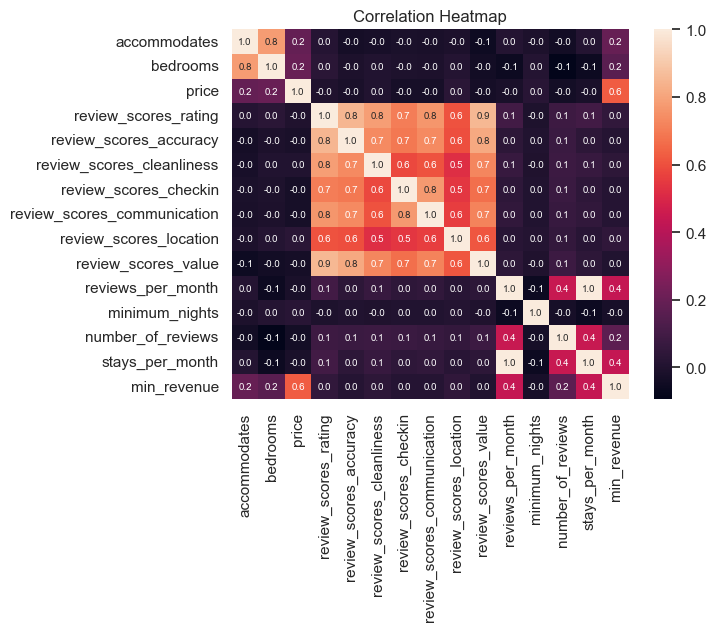

In [20]:
#correlation matrix
corr_map = df.drop('id', axis = 1).corr(numeric_only = True)
sns.heatmap(corr_map, annot = True, annot_kws = {'size': 7}, fmt = '.1f').set(title = "Correlation Heatmap")

From the heatmap it's clear that for what we are trying to predict, price, no features have significant linear correlation. Accommodates and bedrooms have the strongest. The other variable we are interested in is the min_revenue expected, this has a considerable correlation with the features used to calculate it, as expected.

It's also apparent that reviews seem to have little to no affect on the traction on price and revenue generated. This is likely becuase nearly all listings had a rating above 4 stars.

In [21]:
#extracting price and revenue from different room_types
price_room_type = np.array(df.groupby('room_type')['price'].describe()['mean'])
revenue_room_type = np.array(df.groupby('room_type')['min_revenue'].describe()['mean'])

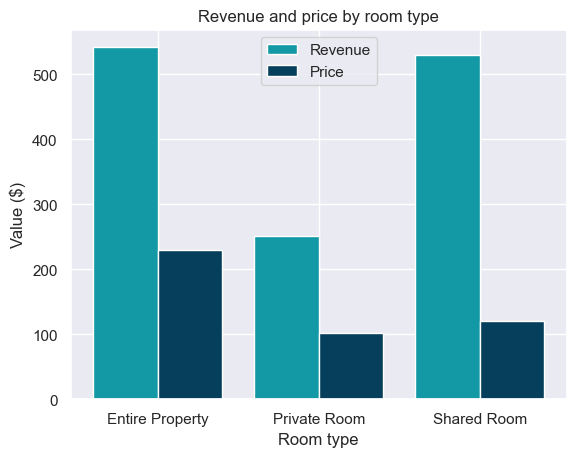

In [22]:
#room type plot
fig, ax = plt.subplots()
x_axis0 = np.arange(df['room_type'].nunique())
x_labels0 = ['Entire Property', 'Private Room','Shared Room']

plt.bar(x_axis0 - 0.2, revenue_room_type, 0.4, label = 'Revenue', color = '#1399A5')
plt.bar(x_axis0 + 0.2, price_room_type, 0.4, label = 'Price', color = '#053F5B')
plt.xticks(x_axis0, x_labels0)
plt.xlabel('Room type')
plt.ylabel('Value ($)')
plt.title('Revenue and price by room type')
plt.legend()



This bar plot demonstrates that entire properties command the largest price and the highest revenue. It is also clear how closely correlated these two features are. It also appears the pricate room and shared room properties dictate a similar price and revenue. This is perhaps becuase they are very similar meaning AirBnB hosts list them interchangeably. 

The next step is to look into the different London neighbourhoods

/var/folders/d7/c45vs6n11xb04j29p_jkmypw0000gn/T/ipykernel_69482/2463568776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = 'neighbourhood_cleansed', x = 'price',


Text(0.5, 1.0, 'Neighbourhood by Price Boxplots')

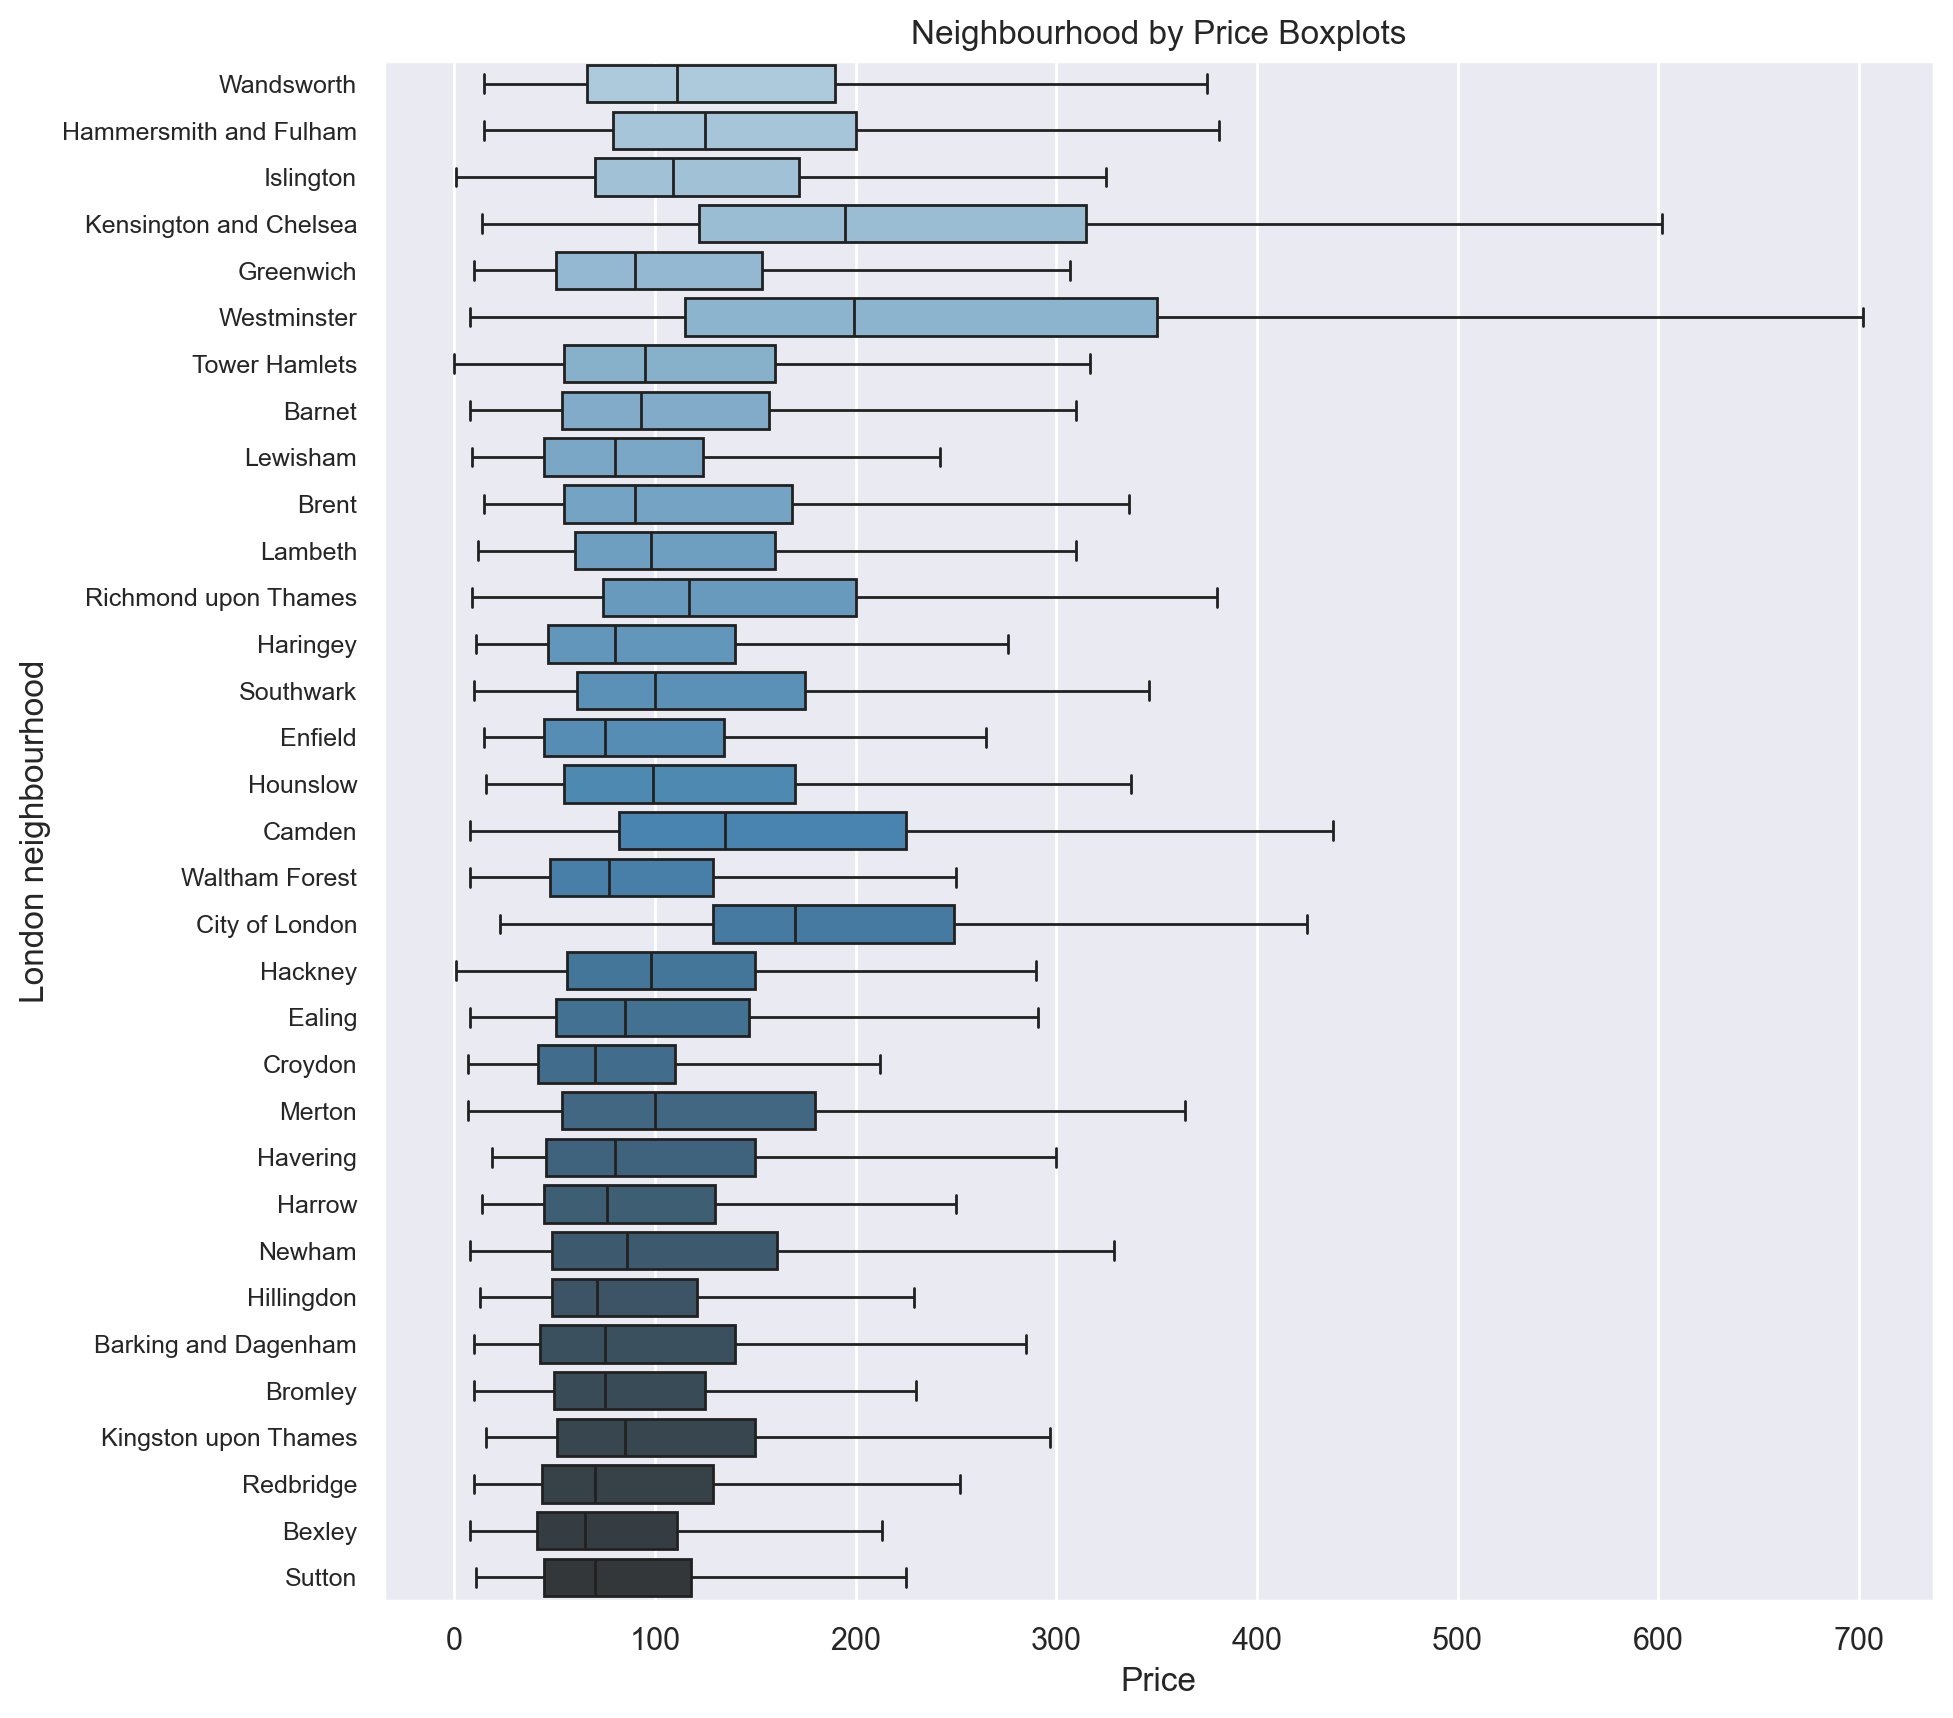

In [23]:
#boxplot figure of price categorised by neighbourhood
plt.figure(figsize=(10,10), dpi = 200)
sns.boxplot(data = df, y = 'neighbourhood_cleansed', x = 'price',
            showfliers = False, palette = 'Blues_d')
plt.yticks(fontsize = 9)
plt.xlabel('Price')
plt.ylabel('London neighbourhood')
plt.title('Neighbourhood by Price Boxplots')

Text(0.5, 1.0, 'Neighbourhood by Minimum Expected Revenue Boxplots')

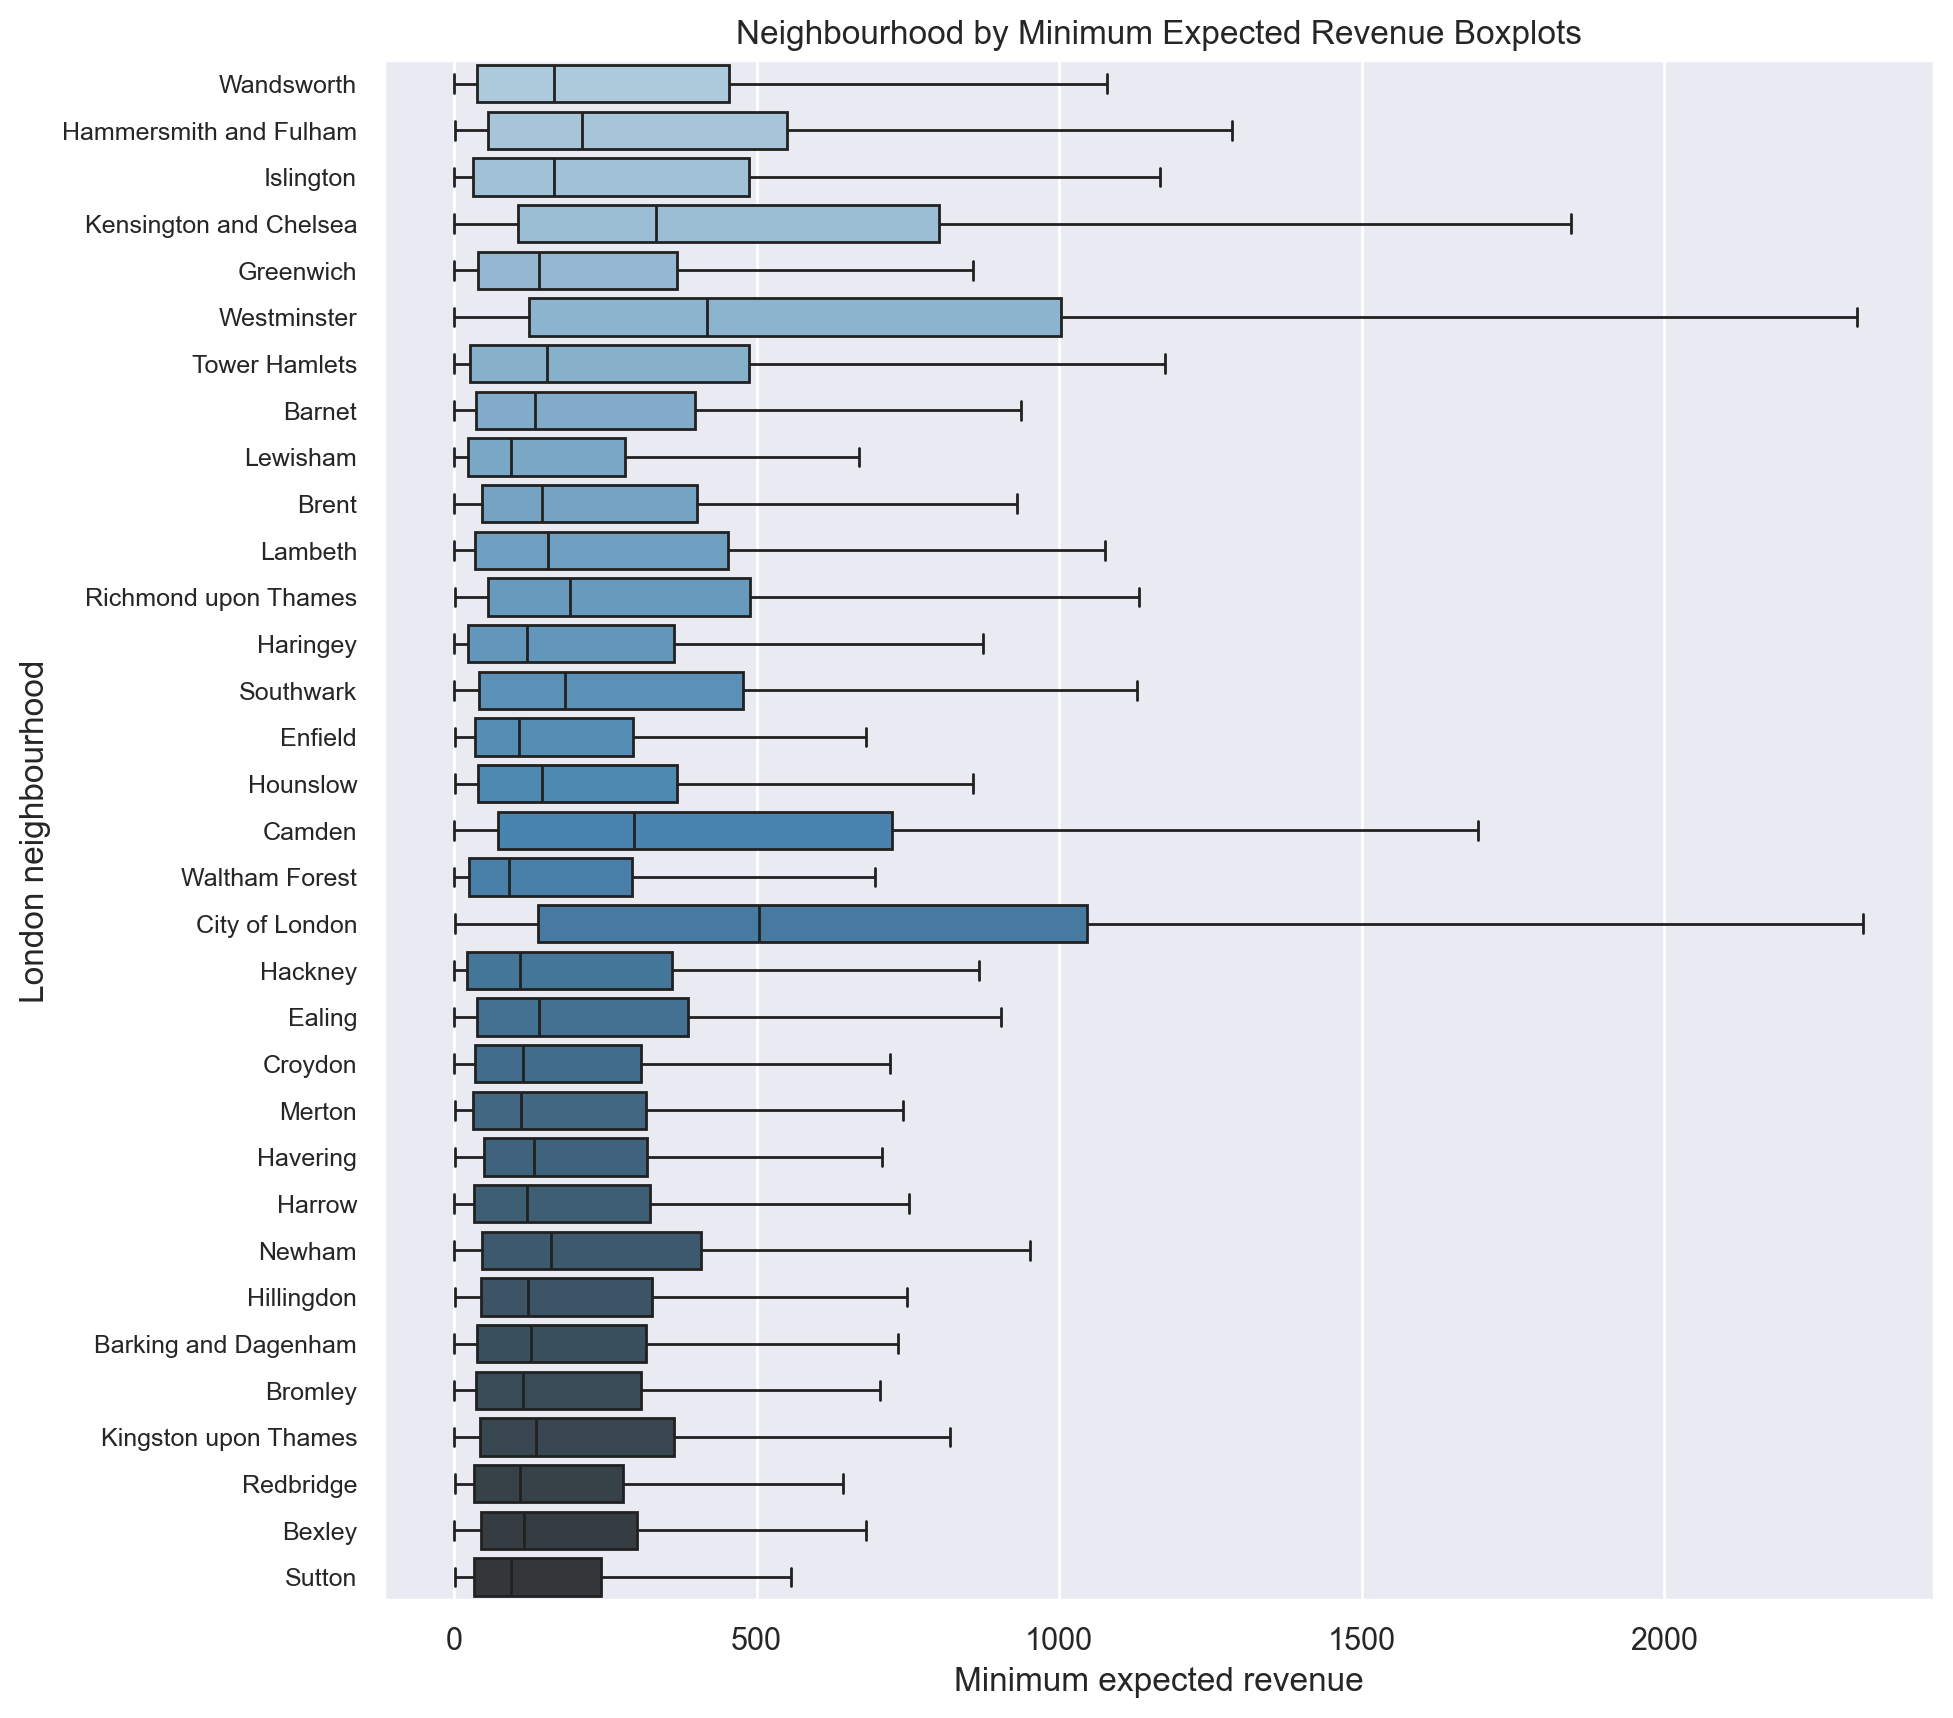

In [24]:
#boxplot of revenue categorised by location
plt.figure(figsize=(10,10), dpi = 200)
sns.boxplot(data = df, y = 'neighbourhood_cleansed', x = 'min_revenue',
             hue = 'neighbourhood_cleansed', showfliers = False, palette = 'Blues_d')
plt.yticks(fontsize = 9)
plt.xlabel('Minimum expected revenue')
plt.ylabel('London neighbourhood')
plt.title('Neighbourhood by Minimum Expected Revenue Boxplots')

From the boxplots, it is clear that the three boroughs that command the highest price are Kensington & Chelsea, Westminster and City of London<br>I will do the same for revenue to ensure there aren't any abnormalities. We are expecting the same pattern

Now I will investigate the accomodates feature, and it's indication of price and revenue

/var/folders/d7/c45vs6n11xb04j29p_jkmypw0000gn/T/ipykernel_69482/262164889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'accommodates', y = 'price', showfliers = False, palette = 'Blues')


Text(0.5, 1.0, 'Price by Accommodates Boxplots')

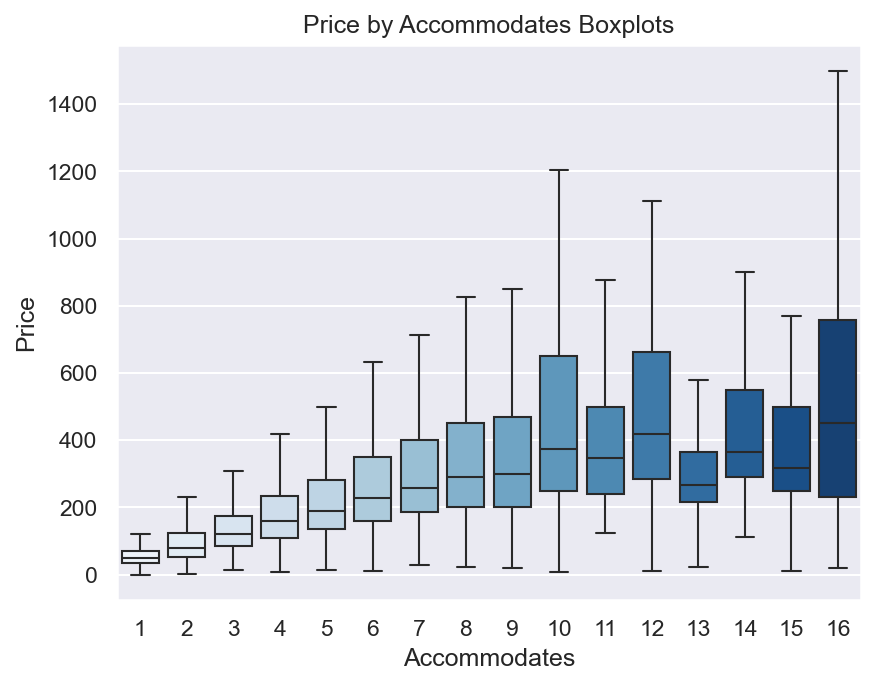

In [25]:
# box plot for accommodates
plt.figure(dpi = 150)
sns.boxplot(data = df, x = 'accommodates', y = 'price', showfliers = False, palette = 'Blues')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Price by Accommodates Boxplots')

/var/folders/d7/c45vs6n11xb04j29p_jkmypw0000gn/T/ipykernel_69482/1918924661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'accommodates', y = 'min_revenue', showfliers = False, palette = 'Blues')


Text(0.5, 1.0, 'Minimum Revenue by Accommodates Boxplots')

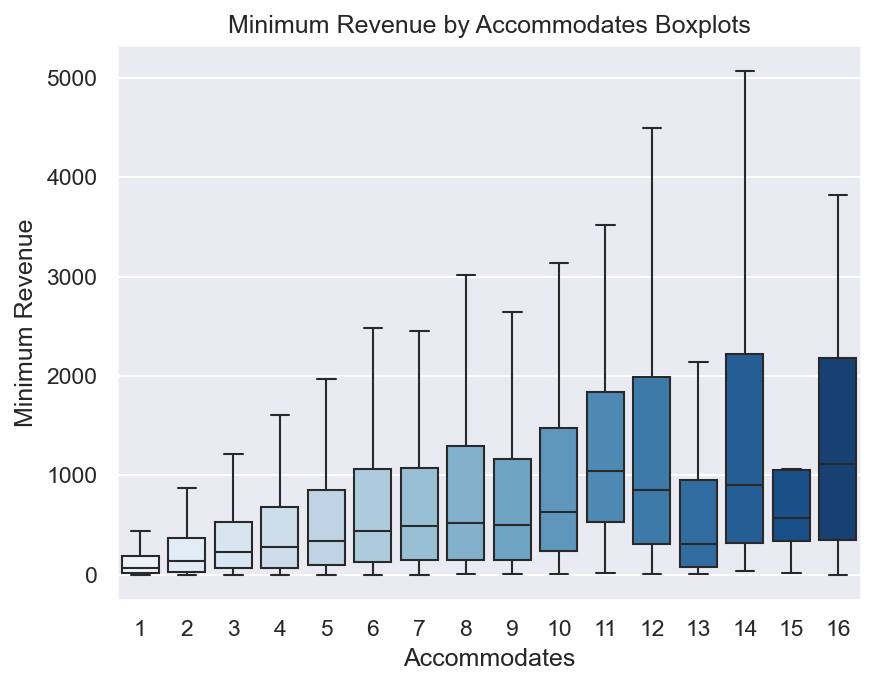

In [26]:
plt.figure(dpi = 150)
sns.boxplot(data = df, x = 'accommodates', y = 'min_revenue', showfliers = False, palette = 'Blues')
plt.xlabel('Accommodates')
plt.ylabel('Minimum Revenue')
plt.title('Minimum Revenue by Accommodates Boxplots')

From the accommodation box plots, it is clear that the median price and revenue tends upwards the more the property can accommodate. However, the IQR and range tends to increase as there are less large accommodating properties in London. This will likely lead to lots of outliers in our data.

Text(0.5, 0.98, 'Violin Plots of Accommmodates and Bedrooms Features')

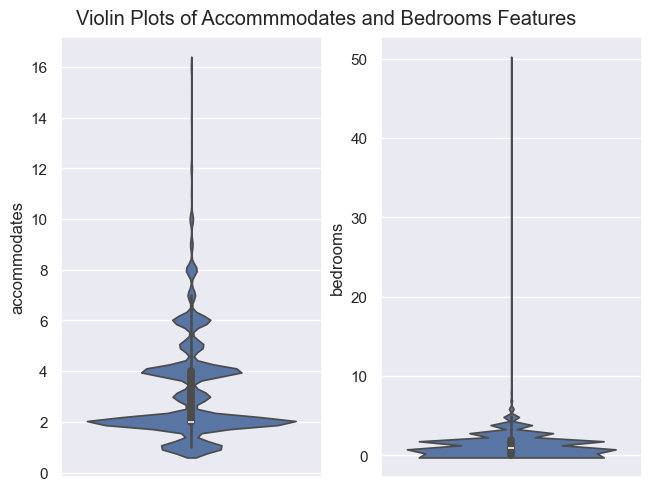

In [27]:
#identifying outliers from accomodation
fig, ax = plt.subplots(1,2, layout = 'constrained')
sns.violinplot(df.accommodates, ax = ax[0], orient = 'x')
sns.violinplot(df.bedrooms, ax = ax[1], orient = 'x')
plt.suptitle('Violin Plots of Accommmodates and Bedrooms Features')

From the violin plots the outliers on the accomomodates and bedrooms are apparant. These outliers will be accounted for later in the data analysis

<Axes: ylabel='stays_per_month'>

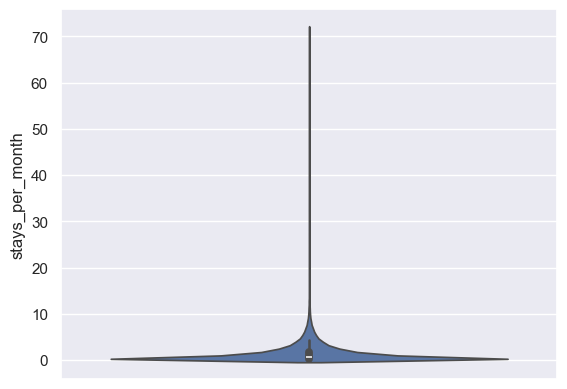

In [28]:
#outliers in stays per month
sns.violinplot(df.stays_per_month)

Looking at the violin plot of stays per month, it is clear there are some results that are impossible (anything over 31)

## Post data analysis cleaning
We will drop some features that we are not using
- **All** reviews
- amenities
- minimum_nights


In [29]:
#dropping redundant features
redundant = ['review_scores_rating',   
            'review_scores_accuracy',  
            'review_scores_cleanliness',
            'review_scores_checkin' ,      
            'review_scores_communication',
            'review_scores_location',    
            'review_scores_value',          
            'reviews_per_month',
            'amenities',
            'minimum_nights']

data = df.drop(redundant, axis = 1)

In [30]:
dummies_neighbourhood = data['neighbourhood_cleansed']
dummy_neighbourhood = pd.get_dummies(dummies_neighbourhood, dtype = int)
dummy_neighbourhood.head()

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
dummies_room = data['room_type']
dummy_room = pd.get_dummies(dummies_room, dtype = int)
dummy_room.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [32]:
#combining dataframes
dummy_df = pd.concat([data,dummy_room,dummy_neighbourhood], axis = 1).drop(['neighbourhood_cleansed',
                                                                          'room_type', 'id', 'number_of_reviews'], axis = 1)
dummy_df.describe()

,accommodates,bedrooms,price,stays_per_month,min_revenue,Entire home/apt,Private room,Shared room,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
count,87946.000000,87946.000000,87946.000000,65788.000000,65788.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000
mean,3.165386,1.119960,181.349817,1.449861,435.546129,0.620551,0.374434,0.005014,0.006413,0.025573,0.005628,0.031155,0.008778,0.065461,0.006095,0.017124,0.024663,0.009324,0.021911,0.070293,0.043151,0.027085,0.005719,0.004480,0.009813,0.014247,0.053158,0.066154,0.007948,0.054283,0.029348,0.016522,0.026277,0.009881,0.014293,0.057024,0.004332,0.080504,0.019501,0.050247,0.113615
std,1.980390,1.231683,486.174310,1.950646,1163.144446,0.485253,0.483979,0.070635,0.079825,0.157857,0.074812,0.173739,0.093280,0.247338,0.077830,0.129735,0.155096,0.096110,0.146394,0.255642,0.203199,0.162331,0.075411,0.066783,0.098573,0.118510,0.224349,0.248553,0.088797,0.226577,0.168780,0.127470,0.159960,0.098912,0.118696,0.231889,0.065677,0.272073,0.138277,0.218455,0.317345
min,1.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,63.000000,0.214286,43.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,110.000000,0.771429,179.171429,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,193.000000,1.885714,510.714286,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,50.000000,80100.000000,71.785714,173012.685714,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Our data has some unexpected lisitings, these will be removed and I will also do away with outliers from all features.

In [33]:
#building a function to remove outliers
def outliers_removal(df, threshold: int, columns: list):
    
    og_df = df #so iqr is calculated on the original df and we don't distort our data 
    for column in columns:
        q1 = og_df[column].quantile(0.25)
        q3 = og_df[column].quantile(0.75)
        iqr = q3 - q1

        inliers = df[(df[column] < q3 + threshold * iqr ) | (df[column] < q1 - threshold * iqr )]
        df = pd.DataFrame(inliers).dropna()    
    

    return df

In [34]:
#calling outliers function
df_fliers = outliers_removal(dummy_df, 1.5, ['price', 'min_revenue', 'accommodates', 'bedrooms','stays_per_month'])

In [35]:
df_fliers[['price', 'min_revenue', 'accommodates', 'stays_per_month', 'bedrooms']].describe()

,price,min_revenue,accommodates,stays_per_month,bedrooms
count,53554.000000,53554.000000,53554.00000,53554.000000,53554.000000
mean,114.814729,223.907912,2.76717,0.973160,0.910315
std,73.631001,256.537836,1.38320,1.000135,0.919015
min,0.000000,0.000000,1.00000,0.014286,0.000000
25%,59.000000,30.171429,2.00000,0.171429,0.000000
50%,97.000000,125.200000,2.00000,0.628571,1.000000
75%,150.000000,331.428571,4.00000,1.428571,2.000000
max,387.000000,1211.885714,6.00000,4.385714,4.000000


With the stays per month, it's probable that there will be more than 4 stays per month. The outlier range for this feature was perhaps too stringent.

<u>Outlier removal</u>

1. Cap the stays per month to 10
1. Use a threshold of 1.5 for the other numeric features

I set these values as I believe they realistically represent the average lisitng that will be used to predict the revenue they can generate.


In [36]:
#removing outliers
df_fliers = outliers_removal(dummy_df, 1.5, ['price', 'min_revenue', 'bedrooms', 'accommodates'])
df_fliers = df_fliers[df_fliers.stays_per_month < 10]

### Standardisation and Normalisation
Now let's check the distributions of the continous data

Text(0.5, 0.98, 'Continous Data Distribution (Pre-Scaling)')

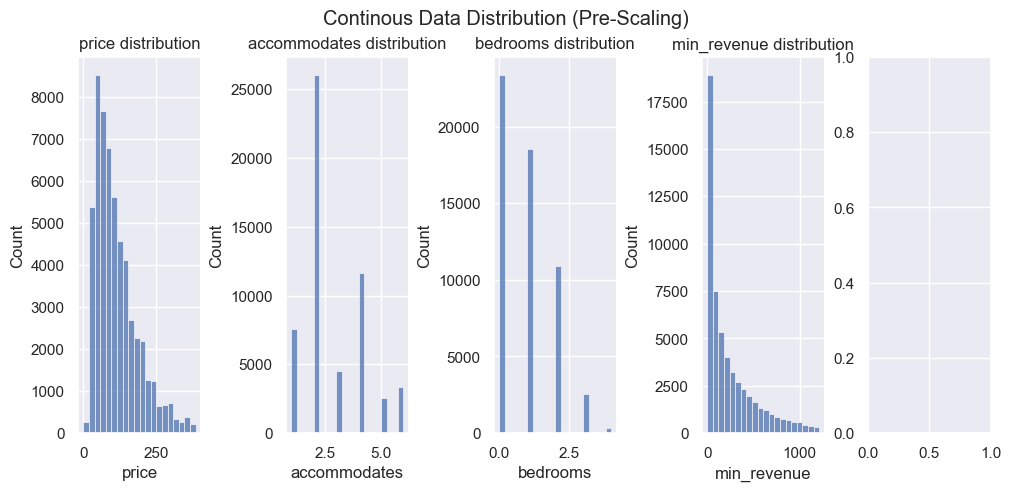

In [37]:
fig, ax = plt.subplots(1,5, layout = 'constrained')
fig.set_figwidth(10)

plot = ['price', 'accommodates', 'bedrooms', 'min_revenue']
for i, plot in enumerate(plot):

    sns.histplot(df_fliers[plot], ax = ax[i], bins = 20)
    ax[i].set_xlabel(plot)
    ax[i].set_title(f'{plot} distribution')

plt.suptitle('Continous Data Distribution (Pre-Scaling)')


All sets of data are heavily left skewed and the ranges are very large. Notice there are some undulations in the data when the prices are higher - this is due to people pricing their property on 'round' numbers.<br> I will scale these features using a scaler from the scikit-learn library. We will use the quantile transformer as this will scale the values between 0 and 1, whilst also standardise the data.

### Splitting data
I will split my data into train, test and split. We will first try and predict the price excluding min_revenue

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
RANDOM_STATE = 42 #defining random state
x_train, x_test, y_train, y_test = train_test_split(df_fliers.drop(['price', 'stays_per_month', 'min_revenue'], axis = 1),
                                                    df_fliers['price'],
                                                    train_size = 0.8, 
                                                    random_state = RANDOM_STATE)

Above is the first set of train/test split data. This data sets price as the target variable and removes price, stays_per_month and min_revenue from the training data. Stays per month has been removed as this is not a feature we want our model to use to predict price.

In [40]:
#import quantile transformer
from sklearn.preprocessing import QuantileTransformer

qt_price_train = QuantileTransformer(n_quantiles = 50)
qt_price_target = QuantileTransformer(n_quantiles = 50)

x_train = qt_price_train.fit_transform(x_train)
x_test = qt_price_train.transform(x_test)

y_train = qt_price_target.fit_transform(y_train.values.reshape(-1,1))
y_test = qt_price_target.transform(y_test.values.reshape(-1,1))

Two quantile transformers have been used here, one for the training data and one for the target variable. In this case I am standardising the target varible as the range is large still.

## Model Selection
The first model we will try is the Ridge model, we will not delve into cross validation techniques as it's computationally expensive.

In [41]:
#importing mdoel
from sklearn.linear_model import Ridge

In [42]:
ridge_price = Ridge(random_state = RANDOM_STATE)
ridge_price.fit(x_train,y_train)

print(f" ridge model --- \n train score: {ridge_price.score(x_train, y_train)} | test accuracy: {ridge_price.score(x_test, y_test)}")

 ridge model --- 
 train score: 0.599520723478464 | test accuracy: 0.598924790198284


Our ridge model perfomance is commendable.<br>
Let's try the _random forest method_. We will use the hyperopt library to refine the hyperparamteres of our model.

In [43]:
#import random forest regressor
from sklearn.ensemble import RandomForestRegressor
from hyperopt import hp, fmin, Trials, STATUS_OK, tpe

In [239]:
#creating hyperparameter space
space = {'min_samples_split': hp.randint('min_samples_split', 2, 10),
        'min_samples_leaf': hp.randint('min_samples_leaf', 1, 5)} 

I will keep the hyperparameter space quite small.

In [240]:
#defining objective function to pass through fmin function
def objective0(space):
    forest = RandomForestRegressor(min_samples_leaf = space['min_samples_leaf'],
                                   min_samples_split = space['min_samples_split'],
                                   random_state = RANDOM_STATE)
    
    forest.fit(x_train, y_train)

    train_score = forest.score(x_train, y_train)
    test_score = forest.score(x_test, y_test)

    print(f'random forest --- train score: {train_score} | test score: {test_score}')

    return {'loss': -test_score, 'status': STATUS_OK }
        

In [242]:
#finding best hyperparamters /w fmin
rf_hyperparameters = fmin(fn = objective0,
                          space = space,
                          trials = Trials(),
                          algo = tpe.suggest,
                          max_evals = 10)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6214700398273902 | test score: 0.6055667691480529
 10%|█         | 1/10 [00:08<01:14,  8.31s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6214700398273902 | test score: 0.6055667691480529
 20%|██        | 2/10 [00:16<01:06,  8.25s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6223049785115256 | test score: 0.6052362953642856
 30%|███       | 3/10 [00:25<00:59,  8.45s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6236787001558868 | test score: 0.6047419455764598
 40%|████      | 4/10 [00:33<00:50,  8.42s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6236787001558868 | test score: 0.6047419455764598
 50%|█████     | 5/10 [00:42<00:42,  8.43s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6222942367168375 | test score: 0.6052400377688867
 60%|██████    | 6/10 [00:51<00:35,  8.88s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6255185220193771 | test score: 0.6040787476622167
 70%|███████   | 7/10 [01:01<00:27,  9.12s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6255926916076802 | test score: 0.6039860052055012
 80%|████████  | 8/10 [01:11<00:19,  9.53s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6251528504125081 | test score: 0.6042915068718644
 90%|█████████ | 9/10 [01:21<00:09,  9.69s/trial, best loss: -0.6055667691480529]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



random forest --- train score: 0.6214700398273902 | test score: 0.6055667691480529
100%|██████████| 10/10 [01:32<00:00,  9.27s/trial, best loss: -0.6055667691480529]


In this case the Ridge model outperformed , let's take a look at using _XGBoosted_

In [44]:
import xgboost as xgb
xgbreg = xgb.XGBRegressor()

In [45]:
xgbreg.fit(x_train, y_train)
print(f'xgboosted model --- \n train score: {xgbreg.score(x_train, y_train)} | test score: {xgbreg.score(x_test, y_test)}')

xgboosted model --- 
 train score: 0.6242505498828221 | test score: 0.6064107029171241


This test score is similar but to our previous models, lets see if we can get some better performance with some hyperparameter tuning

In [46]:
#define hyperparameter space
space = {'max_depth': hp.quniform('max_depth', 3, 18, 1),
         'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
         'learning_rate': hp.quniform('learning_rate', 0,1, 0.01)
    }

In [47]:
#defining xgbregressor
def objective1(space): 
    reg = xgb.XGBRegressor(max_depth = int(space['max_depth']),
                           min_child_weight = int(space['min_child_weight']),
                           learning_rate = space['learning_rate'],
                           )

    evaluation = [(x_train, y_train), (x_test, y_test)]

    reg.fit(x_train, y_train,
            eval_set = evaluation, verbose = False)

    train_score = reg.score(x_train, y_train)
    test_score = reg.score(x_test, y_test)
    print(f'xgboosted model (tuned) --- \n train score: {train_score} | test score: {test_score}')

    return {'loss': - test_score, 'status': STATUS_OK}     

In [48]:
#training for best hyperparameters
trials = Trials()

best_hyperparams = fmin(fn = objective1,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 50,
                        trials = trials)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

xgboosted model (tuned) ---                           
 train score: 0.6206060240041656 | test score: 0.6078622369454298
xgboosted model (tuned) ---                                                      
 train score: 0.6223904473719715 | test score: 0.6045097965204833
xgboosted model (tuned) ---                                                      
 train score: 0.6257087424753299 | test score: 0.6032069855009841
xgboosted model (tuned) ---                                                      
 train score: 0.6251607841942926 | test score: 0.6034718155236509
xgboosted model (tuned) ---                                                      
 train score: 0.6258876761811564 | test score: 0.6026315318681517
xgboosted model (tuned) ---                                                      
 train score: 0.6233191509307427 | test score: 0.6056257540970604
xgboosted model (tuned) ---                                                      
 train score: 0.6253777194838797 | test score: 0.60364391

In [49]:
#show best hyperparameters
best_hyperparams

{'learning_rate': 0.15, 'max_depth': 6.0, 'min_child_weight': 6.0}

Using these hyperparmaters I will now fit the final xgboosted model

In [50]:
#refined xgboosted model
xgbreg_price = xgb.XGBRegressor(max_depth = int(best_hyperparams['max_depth']),
                                min_child_weight = int(best_hyperparams['min_child_weight']),
                                learning_rate = best_hyperparams['learning_rate'])

xgbreg_price.fit(x_train,y_train)
print(f'xgboosted model --- \n train score: {xgbreg_price.score(x_train, y_train)} | test score: {xgbreg_price.score(x_test, y_test)}')


xgboosted model --- 
 train score: 0.6193644093724158 | test score: 0.6082591996540295


The refined xgboost model is a slight performance increase on the Ridge model.

I will now use the data to predict the __min_revenue__ expected. I will use just the Ridge and xgboosted models as they had the best efficiency

In [51]:
#redefining train and test data
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_fliers.drop(['stays_per_month', 'min_revenue'], axis = 1),
                                                        df_fliers['min_revenue'],
                                                        train_size = 0.8, 
                                                        random_state = RANDOM_STATE)

In [52]:
#scaling data for min_revenue prediction
qt_rev_train = QuantileTransformer(n_quantiles = 50)
qt_rev_target = QuantileTransformer(n_quantiles = 50)

x_train1 = qt_rev_train.fit_transform(x_train1)
x_test1 = qt_rev_train.transform(x_test1)

y_train1 = qt_rev_target.fit_transform(y_train1.values.reshape(-1,1))
y_test1 = qt_rev_target.transform(y_test1.values.reshape(-1,1))

In [53]:
#min_revenue ridge model
ridge_rev = Ridge()
ridge_rev.fit(x_train1, y_train1)

print(f" ridge model --- \n train score: {ridge_rev.score(x_train1, y_train1)} | test accuracy: {ridge_rev.score(x_test1, y_test1)}")

 ridge model --- 
 train score: 0.25547523036631836 | test accuracy: 0.251569600895009


In [54]:
#xgbregressor for min_revenue
def objective2(space): 
    reg = xgb.XGBRegressor(max_depth = int(space['max_depth']),
                           min_child_weight = int(space['min_child_weight']),
                           learning_rate = space['learning_rate'])

    evaluation = [(x_train1, y_train1), (x_test1, y_test1)]

    reg.fit(x_train1, y_train1,
            eval_set = evaluation, verbose = False)

    train_score = reg.score(x_train1, y_train1)
    test_score = reg.score(x_test1, y_test1)
    print(f'xgboosted model (tuned) --- \n train score: {train_score} | test score: {test_score}')

    return {'loss': - test_score, 'status': STATUS_OK}     

In [56]:
#fiding best hyperparameters
trials = Trials()

best_hyperparams = fmin(fn = objective2,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)

xgboosted model (tuned) ---                           
 train score: 0.4802196601095413 | test score: 0.3297414052922063
xgboosted model (tuned) ---                                                      
 train score: 0.5727936794847912 | test score: 0.24003276273081975
xgboosted model (tuned) ---                                                      
 train score: 0.6133808658138455 | test score: 0.1997455660713885
xgboosted model (tuned) ---                                                      
 train score: 0.4526667424057803 | test score: 0.322776839637096
xgboosted model (tuned) ---                                                      
 train score: 0.5151274280573899 | test score: 0.28689007016440515
xgboosted model (tuned) ---                                                      
 train score: 0.5654994693645585 | test score: 0.24723784106931146
xgboosted model (tuned) ---                                                      
 train score: 0.42790887105770725 | test score: 0.33731

In [57]:
best_hyperparams

{'learning_rate': 0.19, 'max_depth': 6.0, 'min_child_weight': 3.0}

In [58]:
#refined xgboosted model
xgbreg_revenue = xgb.XGBRegressor(max_depth = int(best_hyperparams['max_depth']),
                                  min_child_weight = int(best_hyperparams['min_child_weight']),
                                  learning_rate = best_hyperparams['learning_rate'])

xgbreg_revenue.fit(x_train1,y_train1)
print(f'''xgboosted model (min revenue) ---
      train score: {xgbreg_revenue.score(x_train1, y_train1)} | test score: {xgbreg_revenue.score(x_test1, y_test1)}''')

xgboosted model (min revenue) ---
      train score: 0.3981689163430755 | test score: 0.33808276281025407


The xgboost model for predicting revenue is a significant improvement on the Ridge model

## Model Analysis
Let's take a look at how our models perfomed and what features are the most important for our models.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


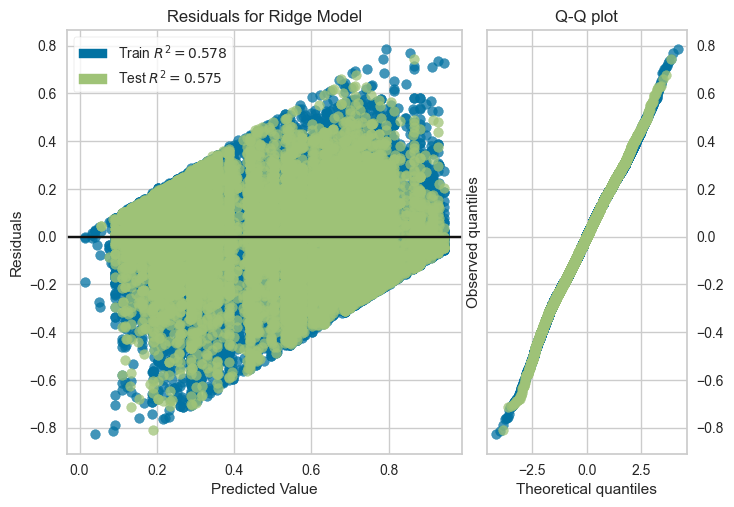

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#import yellowbrick for visualisation
from yellowbrick.regressor import ResidualsPlot

#price residuals
visualizer_price = ResidualsPlot(ridge_price, hist = False, qqplot = True)
visualizer_price.fit(x_train, y_train)
visualizer_price.score(x_test, y_test)  

visualizer_price.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


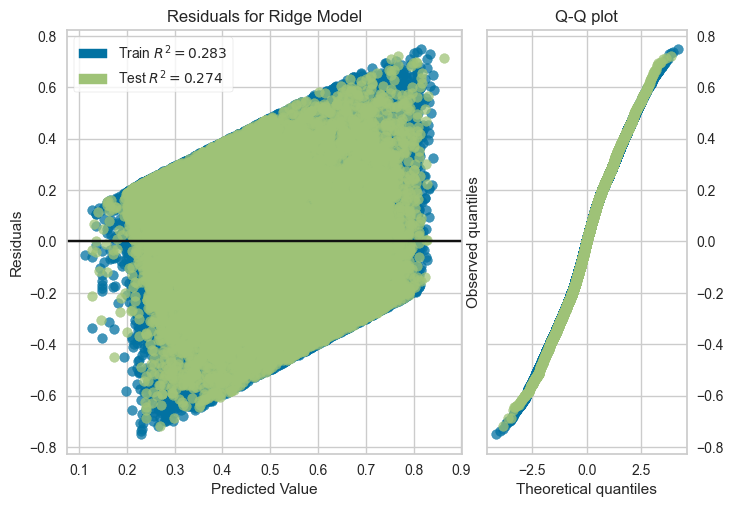

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#revenue residuals
visualizer_rev = ResidualsPlot(ridge_rev, hist = False, qqplot = True)
visualizer_rev.fit(x_train1, y_train1)
visualizer_rev.score(x_test1, y_test1)

visualizer_rev.show()

From the residuals plot, it can be seen that there is a skew in the data where the ridge model tended to underpredict lower values and over predict larger values.

Let's take a look at out tree model

Text(0.5, 1.0, 'Feature Importance (revenue)')

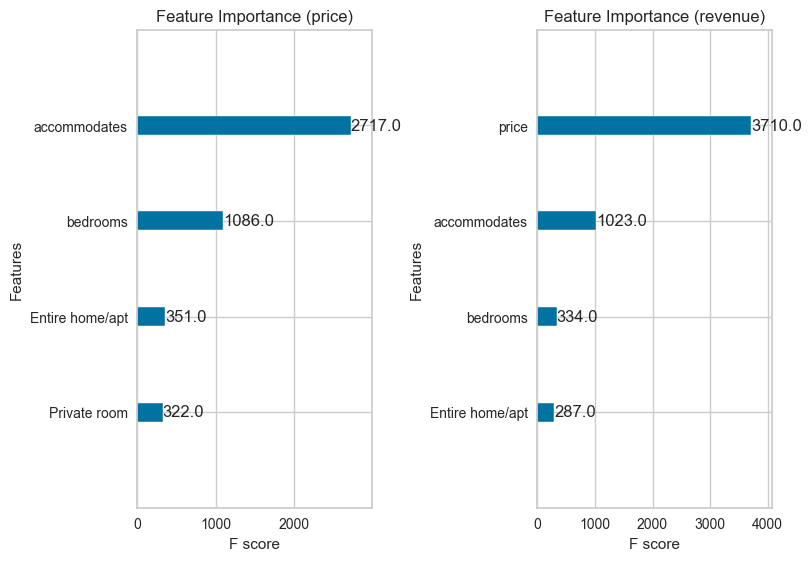

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,2, layout = 'constrained')

plot_importance(xgbreg_price, max_num_features = 4, ax = ax[0])
plot_importance(xgbreg_revenue, max_num_features = 4, ax = ax[1])

ax[0].set_title('Feature Importance (price)')
ax[1].set_title('Feature Importance (revenue)')

It is no suprise that price is by far the most important feature for governing the minimum expected revenue, whilst the number of people the listing accomodates is vital to determine both price and revenue.

### Saving models

In [76]:
#saving for models
import pickle

with open('xgb_rev.pkl', 'wb') as files:
    pickle.dump(xgbreg_revenue, files)

with open('ridge_price.pkl', 'wb') as files:
    pickle.dump(ridge_price, files)

with open('price_transformer_train.pkl', 'wb') as files:        
    pickle.dump(qt_price_train, files)

with open('price_transformer_target.pkl', 'wb') as files:
    pickle.dump(qt_price_target, files)    

with open('revenue_transformer_target.pkl', 'wb') as files:
    pickle.dump(qt_rev_target, files) 

with open('dataframe.pkl', 'wb') as files:
    pickle.dump(df_fliers, files)    